# SAMueL-2 full production analysis

## Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.data_process import DataProcess
from utils.descriptive_stats import DescriptiveStatistics
from utils.pathway import Pathway
from utils.reporting import GlobalReport
from utils.thrombolysis_choice_model import ThrombolysisChoiceModel
from utils.thrombolysis_outcome_model import OutcomeModel

## Create data for models

See 'data' folder for processing of raw data.

In [2]:
data_processor = DataProcess(
    year_min=2016,
    year_max=2021,
    limit_to_ambo=True,
)

data_processor.run()

All rows: 283226, ML rows:119875, Fraction: 0.42


## Model Run

In [3]:
run_model = True

if run_model:
    # Descriptive statistics
    ds = DescriptiveStatistics()
    #ds.run()
    
    # Thrombolysis decision model
    thrombolysis_choice_model = ThrombolysisChoiceModel()
    #thrombolysis_choice_model.run()

    # Outcome model
    outcome_model = OutcomeModel()
    outcome_model.run()

    # Pathway simulation
    
    """
    pathway = Pathway(
        data_processor.pathway_simulation_parameters,
        thrombolysis_choice_model.benchmark_thrombolysis,
        trials=100)
    pathway.run()
    """

Outcome multiclass ROC AUC 0.795


In [4]:
outcome_model.all_patients_outcomes_untreated_weighted_mrs.mean()

2.7531715244804653

In [5]:
outcome_model.all_patients_outcomes_treated_weighted_mrs.mean()


2.6105139675365416

In [6]:
outcome_model.all_patients_outcomes_improved.mean()

0.5482985660871427

(array([1.500e+01, 1.700e+01, 2.200e+01, 3.300e+01, 4.500e+01, 5.700e+01,
        6.600e+01, 1.190e+02, 1.020e+02, 1.730e+02, 2.210e+02, 2.430e+02,
        3.240e+02, 4.140e+02, 5.470e+02, 7.200e+02, 9.360e+02, 1.177e+03,
        1.512e+03, 1.937e+03, 2.194e+03, 2.700e+03, 3.149e+03, 3.801e+03,
        4.409e+03, 4.840e+03, 5.663e+03, 6.555e+03, 7.445e+03, 7.332e+03,
        5.773e+03, 4.186e+03, 3.052e+03, 2.322e+03, 1.663e+03, 1.262e+03,
        1.067e+03, 7.070e+02, 5.240e+02, 3.930e+02, 3.280e+02, 2.580e+02,
        1.850e+02, 1.630e+02, 1.050e+02, 1.200e+02, 8.100e+01, 5.800e+01,
        6.100e+01, 3.700e+01, 3.800e+01, 3.400e+01, 3.000e+01, 2.700e+01,
        2.400e+01, 2.400e+01, 1.700e+01, 8.000e+00, 1.300e+01, 7.000e+00]),
 array([-1.50000000e+00, -1.45000000e+00, -1.40000000e+00, -1.35000000e+00,
        -1.30000000e+00, -1.25000000e+00, -1.20000000e+00, -1.15000000e+00,
        -1.10000000e+00, -1.05000000e+00, -1.00000000e+00, -9.50000000e-01,
        -9.00000000e-01, -8.50

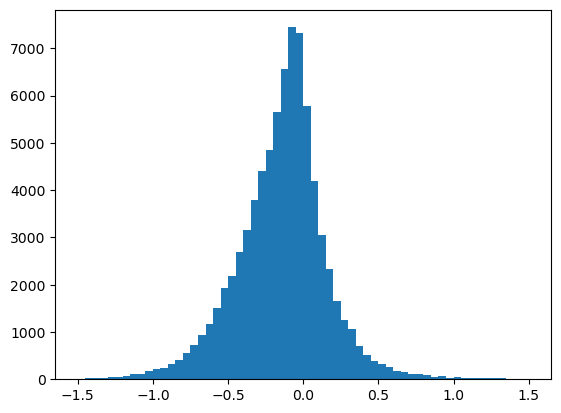

In [7]:
diff = outcome_model.all_patients_outcomes_treated_weighted_mrs - outcome_model.all_patients_outcomes_untreated_weighted_mrs
# Plot histogram of difference in mRS
plt.hist(diff, bins=np.arange(-1.5,1.51,0.05))

In [8]:
outcome_model.all_patients_outcomes_treated[:, 0:5].sum(axis=1)

array([0.95344937, 0.18646605, 0.6852014 , ..., 0.9819784 , 0.9310249 ,
       0.761091  ], dtype=float32)

In [9]:
outcome_model.all_patients_outcomes_treated[:, 0:5]

array([[0.1489871 , 0.29449347, 0.2150955 , 0.13389911, 0.1609742 ],
       [0.00280784, 0.00333928, 0.00309516, 0.0082126 , 0.16901118],
       [0.0068168 , 0.02002584, 0.05591718, 0.32677066, 0.27567098],
       ...,
       [0.08648558, 0.09076235, 0.10630733, 0.06223492, 0.6361882 ],
       [0.23064001, 0.2783478 , 0.21072897, 0.15906106, 0.05224703],
       [0.12416012, 0.28772572, 0.14261802, 0.1433071 , 0.06328002]],
      dtype=float32)

## Reporting

In [10]:
report = GlobalReport()
report.create_report()